# District Understanding


Read District data and creates a dataframe:

In [12]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# displays plots in the notebook
%matplotlib inline

def read_frame(name: str) -> pd.DataFrame:
    return pd.read_csv('../data/preprocessed/' + name + '.csv', sep=';')

districts = read_frame('district')
districts.head()

,id,region,num_inhab,num_municip_inhab_0_499,num_municip_inhab_500_1999,num_municip_inhab_2000_9999,num_municip_inhab_10000_,num_cities,perc_urban_inhab,avg_salary,perc_unemploy_95,perc_unemploy_96,enterp_per_1000,num_crimes_95,num_crimes_96,region_direction,city
0,1,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,NaN,Hl.m. Praha
1,2,Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,central,Benesov
2,3,Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,central,Beroun
3,4,Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,central,Kladno
4,5,Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,central,Kolin


# Heatmap

Better visualization of relationships between attributes

<AxesSubplot:>

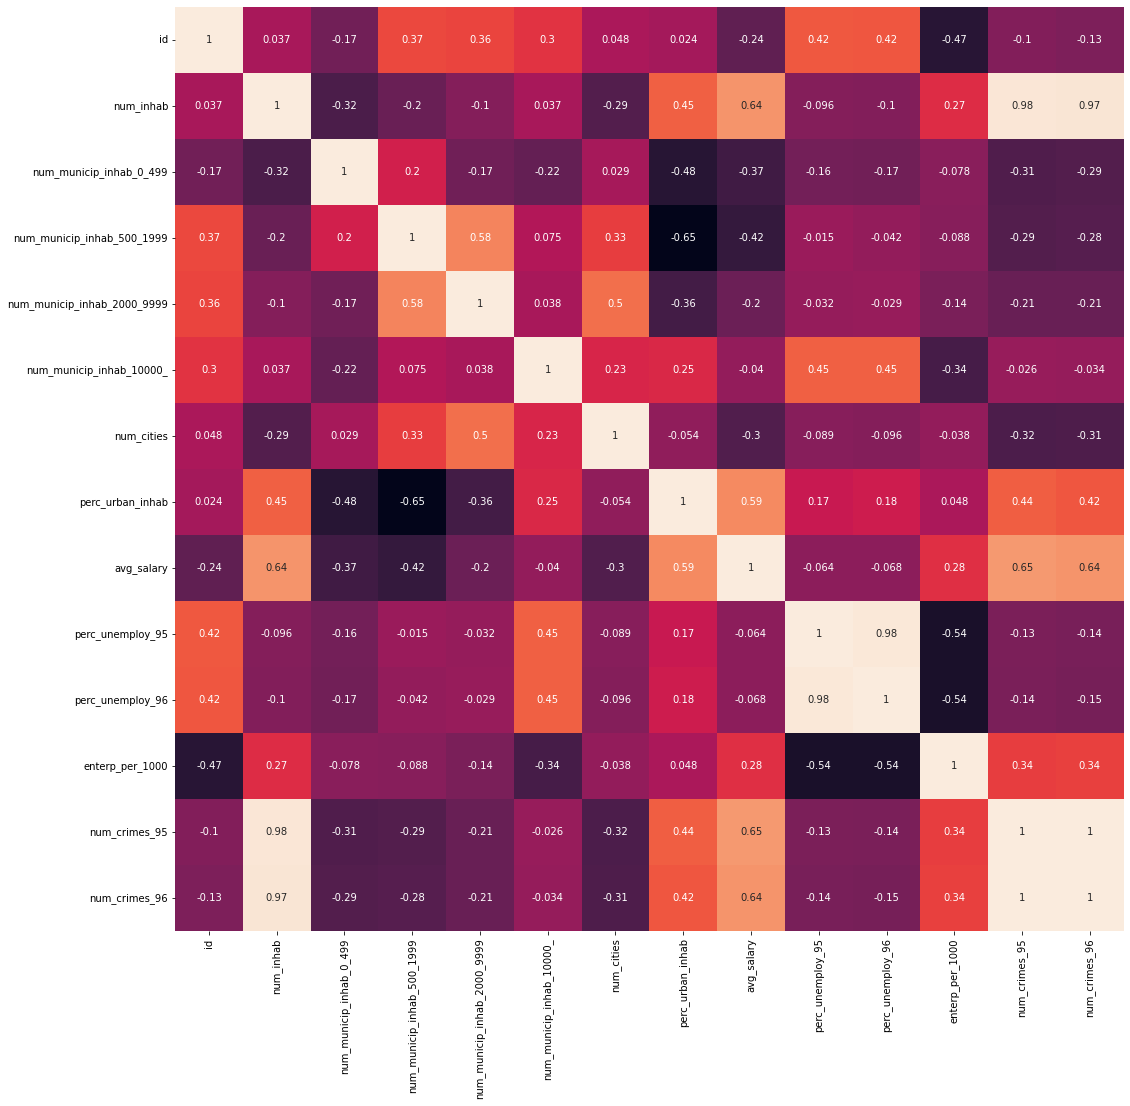

In [13]:
plt.figure(figsize=(17, 17))
sns.heatmap(districts.corr(), annot=True, cbar=False)

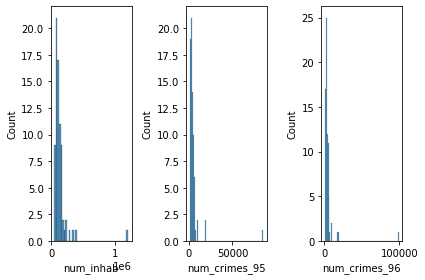

In [106]:
fig, ax = plt.subplots(1,3)

# Create the graphics
sns.histplot(data=districts, x='num_inhab', ax=ax[0])
sns.histplot(data=districts, x='num_crimes_95', ax=ax[1])
sns.histplot(data=districts, x='num_crimes_96', ax=ax[2])

# Display the figures in a nice way
fig.tight_layout()

# Unemploymant rate

Difference between employmant rate in '95 and '96

In [67]:
print(f"Crimes: {districts['num_crimes_95'].mean()}, Unemploy: {districts['perc_unemploy_95'].mean()}")

Crimes: 4850.315789473684, Unemploy: 3.1193421052631574


In [68]:
print(f"Crimes: {districts['num_crimes_96'].mean()}, Unemploy: {districts['perc_unemploy_96'].mean()}")

Crimes: 5079.1578947368425, Unemploy: 3.744605263157895


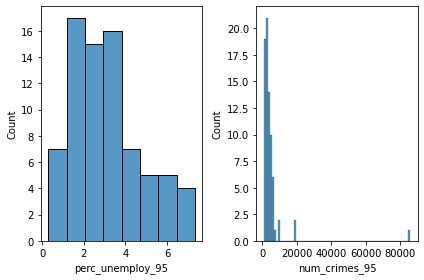

In [22]:
fig, ax = plt.subplots(1,2)

# Create the graphics
sns.histplot(data=districts, x='perc_unemploy_95', ax=ax[0])
sns.histplot(data=districts, x='num_crimes_95', ax=ax[1])

# Display the figures in a nice way
fig.tight_layout()

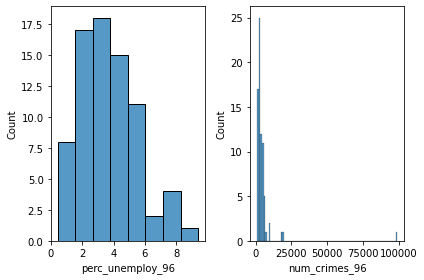

In [23]:
fig, ax = plt.subplots(1,2)

# Create the graphics
sns.histplot(data=districts, x='perc_unemploy_96', ax=ax[0])
sns.histplot(data=districts, x='num_crimes_96', ax=ax[1])

# Display the figures in a nice way
fig.tight_layout()

In [30]:
districts['region'].unique()

array(['Prague', 'Bohemia', 'Moravia'], dtype=object)

In [53]:
prague = districts[districts['region'] == 'Prague']
bohemia = districts[districts['region'] == 'Bohemia']
moravia = districts[districts['region'] == 'Moravia']

In [54]:
prague['avg_salary'].mean()

12541.0

In [55]:
bohemia['avg_salary'].mean()

9042.313725490196

In [56]:
moravia['avg_salary'].mean()

8898.625

Let's divide by regions

# Bohemia Region


In [84]:
direction = bohemia['region_direction'].unique()

In [96]:
for i in direction:
    region_direction = bohemia[bohemia['region_direction'] == i]
    print(f"Direction: {i}, {region_direction['avg_salary'].mean()}, Per Capita {region_direction['avg_salary'].mean()}")

Direction: south, 8831.5, Per Capita 0.10084570971816813
Direction: north, 9334.2, Per Capita 0.07917202795304744


In [91]:
print(f"Crimes per inhab: {bohemia['num_crimes_96'].mean()/ bohemia['num_inhab'].mean()}, Unemploy: {bohemia['perc_unemploy_96'].mean()},\
 Urban: {bohemia['perc_urban_inhab'].mean()}, Enterpreuner: {bohemia['enterp_per_1000'].mean()}")

Crimes per inhab: 0.03278450638751398, Unemploy: 3.4294117647058826, Urban: 64.09803921568627, Enterpreuner: 118.76470588235294


# Moravia Region

In [92]:
direction = moravia['region_direction'].unique()

In [98]:
for i in direction:
    region_direction = moravia[moravia['region_direction'] == i]
    print(f"Direction: {i}, {region_direction['avg_salary'].mean()}, Per Capita {region_direction['avg_salary'].mean()}")

Direction: south, 8728.5, Per Capita 8728.5
Direction: north, 9136.8, Per Capita 9136.8


In [99]:
print(f"Crimes per inhab: {moravia['num_crimes_96'].mean()/ moravia['num_inhab'].mean()}, Unemploy: {moravia['perc_unemploy_96'].mean()},\
 Urban: {moravia['perc_urban_inhab'].mean()}, Enterpreuner: {moravia['enterp_per_1000'].mean()}")

Crimes per inhab: 0.030232493904536632, Unemploy: 4.552499999999999, Urban: 59.84583333333334, Enterpreuner: 108.08333333333333


# Prague

In [100]:
print(f"Crimes per inhab: {prague['num_crimes_96'].mean() / prague['num_inhab'].mean()}, Unemploy: {prague['perc_unemploy_96'].mean()},\
 Urban: {prague['perc_urban_inhab'].mean()}, Enterpreuner: {prague['enterp_per_1000'].mean()}")

Crimes per inhab: 0.08224968110789384, Unemploy: 0.43, Urban: 100.0, Enterpreuner: 167.0
